# Dimensionality Reduction

In [1]:
from IPython.display import Image

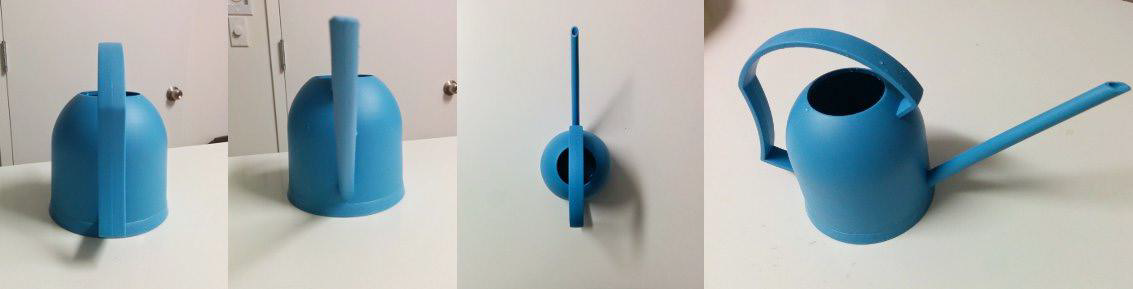

In [2]:
Image('pca-1.png')

```
1) Mostly used for data compression.
2) Algorithms run quickly.
3) Less memory required.
```

**Note:** Should not be used to overcome overfitting.

In dimensionality reduction the number of features get compressed such that those features which are more relevant to data are only available.

## Principal Component Analysis (Unsupervised learning)

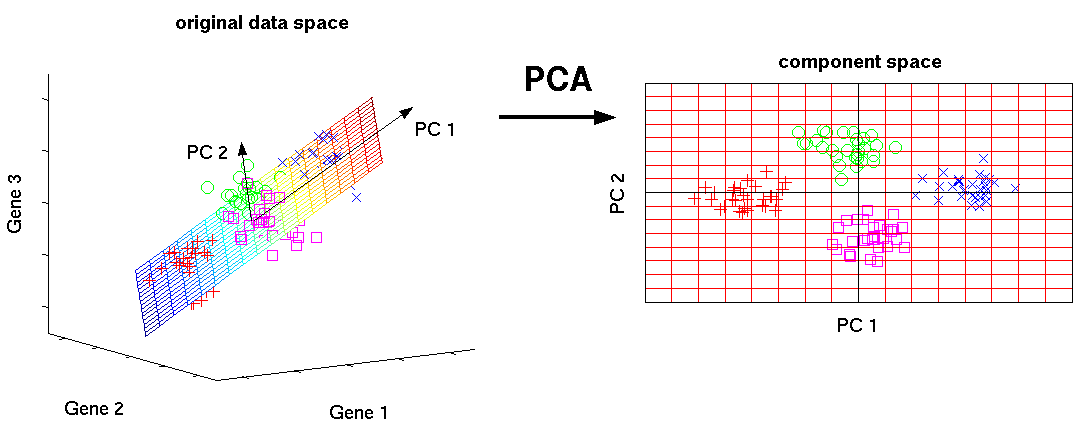

In [3]:
Image('pca-2.png')

1) PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one.

2) The orthogonal axes (principal components) of the new subspace can be interpreted
   as the directions of maximum variance given the constraint that the new feature axes
   are orthogonal to each other.

### Algorithm:

```
1. Standardize the d -dimensional dataset.
2. Construct the covariance matrix. (d x d dimensional)
3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
4. Select k eigenvectors that correspond to the k largest eigenvalues,
   where k is the dimensionality of the new feature subspace ( k <= d ).
5. Construct a projection matrix W from the "top" k eigenvectors.
6. Transform the d -dimensional input dataset X using the projection
   matrix W to obtain the new k -dimensional feature subspace.
```

#### Covariance:

$$\sigma_{jk} = \frac{1}{n}\sum_{i=1}^n (x_j^{(i)} - \mu_j)(x_k^{(i)} - \mu_k) $$

$j,k $ are features

#### Covariance Matrix:

$$\Sigma = \left[\begin{array}{rrr}
    \sigma_{11} & \sigma_{12} & \sigma_{13} \\
    \sigma_{21} & \sigma_{22} & \sigma_{23} \\
    \sigma_{31} & \sigma_{32} & \sigma_{33}
  \end{array}\right]_{d x d}$$

#### Eigen Vectors & Values:

$$\Sigma v = \lambda v$$

$v$ is eigen vector and $\lambda$ is eigen value (scalar)

$W$ is a projection matrix which contains eigen vectors corresponding to top $k$ eigen values. Therefore $W$ is of dimension $d$x$k$.

#### Projecting Samples:

$$X' = XW$$

So therfore $X'$ is the reduced matrix.

#### Variance explained ratio:

Used to select no.of.components the features to be reduced to.

$$\frac{\lambda_j}{\sum_{j=1}^d \lambda_j}$$

So let's see an example:

In [4]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
X,Y = df.iloc[:,1:].values,df.iloc[:,0].values

In [8]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [10]:
cov_mat = np.cov(X_train_std.T)

In [11]:
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)

In [12]:
eigen_vals

array([ 4.8923083 ,  2.46635032,  1.42809973,  1.01233462,  0.84906459,
        0.60181514,  0.52251546,  0.33051429,  0.08414846,  0.29595018,
        0.16831254,  0.21432212,  0.2399553 ])

In [13]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals,reverse=True)]

In [14]:
cum_sum = np.cumsum(var_exp)

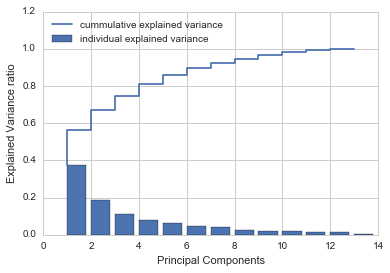

In [15]:
plt.bar(range(1,14),var_exp,label='individual explained variance')
plt.step(range(1,14),cum_sum,label='cummulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance ratio')
plt.legend(loc='upper left')

In [16]:
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals)) ]

In [17]:
eigen_pairs.sort(reverse=True)

In [18]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:,np.newaxis]))

In [19]:
w

array([[-0.14669811,  0.50417079],
       [ 0.24224554,  0.24216889],
       [ 0.02993442,  0.28698484],
       [ 0.25519002, -0.06468718],
       [-0.12079772,  0.22995385],
       [-0.38934455,  0.09363991],
       [-0.42326486,  0.01088622],
       [ 0.30634956,  0.01870216],
       [-0.30572219,  0.03040352],
       [ 0.09869191,  0.54527081],
       [-0.30032535, -0.27924322],
       [-0.36821154, -0.174365  ],
       [-0.29259713,  0.36315461]])

In [20]:
X_train_pca = X_train_std.dot(w)

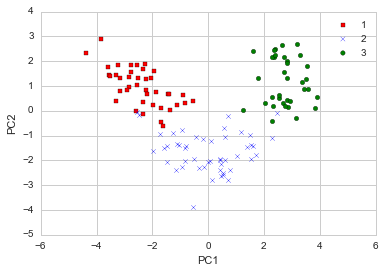

In [21]:
colors = ['r','b','g']
markers = ['s','x','o']
for l, c, m in zip(np.unique(Y_train), colors, markers):
    plt.scatter(X_train_pca[Y_train==l, 0],
    X_train_pca[Y_train==l, 1],
    c=c, label=l, marker=m)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

The same can be achived simply using sklearn module.

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)

In [24]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

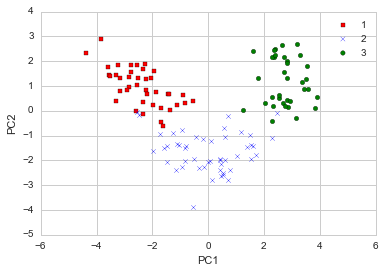

In [25]:
colors = ['r','b','g']
markers = ['s','x','o']
for l, c, m in zip(np.unique(Y_train), colors, markers):
    plt.scatter(X_train_pca[Y_train==l, 0],
    X_train_pca[Y_train==l, 1],
    c=c, label=l, marker=m)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

In order to get explained variance ratio then initialize PCA with n_components=None, so all principal components are kept.

In [26]:
pca = PCA(n_components=None)
pca.fit(X_train_std)

PCA(copy=True, n_components=None, whiten=False)

In [27]:
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

In [28]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.37329648,  0.56148574,  0.67045365,  0.74769754,  0.81248349,
        0.85840362,  0.89827298,  0.92349212,  0.94607393,  0.96438317,
        0.98073654,  0.99357924,  1.        ])

So we can use this reduced data to Regressions,SVMs etc